<a href="https://colab.research.google.com/github/Abhieo07/Basics_ml/blob/main/Reinforcement_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reinforcement Learning
Reinforcement learning (RL) is a general framework where agents learn to perform actions in an environment so as to maximize a reward. The two main components are the environment, which represents the problem to be solved, and the agent, which represents the learning algorithm.

https://www.tensorflow.org/agents/tutorials/0_intro_rl#q-learning

**Q-Learning**

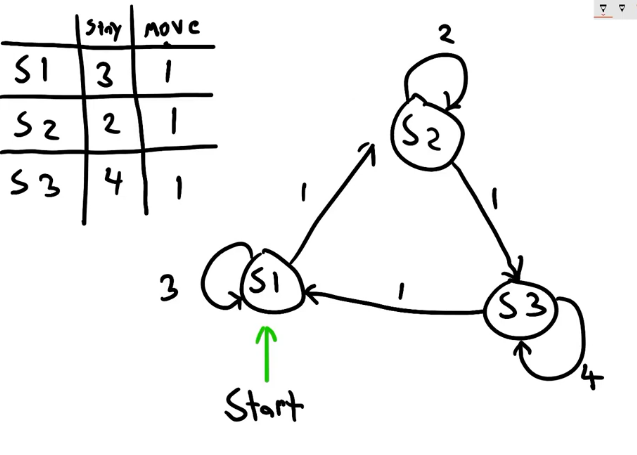

Q-Learning is based on the notion of a Q-function. The Q-function (a.k.a the state-action value function) of a policy $\pi$, $Q^{\pi}(s, a)$, measures the expected return or discounted sum of rewards obtained from state $s$ by taking action $a$ first and following policy $\pi$ thereafter. We define the optimal Q-function $Q^*(s, a)$ as the maximum return that can be obtained starting from observation $s$, taking action $a$ and following the optimal policy thereafter. The optimal Q-function obeys the following *Bellman* optimality equation:

$\begin{equation}Q^\ast(s, a) = \mathbb{E}[ r + \gamma \max_{a'} Q^\ast(s', a') ]\end{equation}$

This means that the maximum return from state $s$ and action $a$ is the sum of the immediate reward $r$ and the return (discounted by $\gamma$) obtained by following the optimal policy thereafter until the end of the episode (i.e., the maximum reward from the next state $s'$). The expectation is computed both over the distribution of immediate rewards $r$ and possible next states $s'$.

The basic idea behind Q-Learning is to use the Bellman optimality equation as an iterative update $Q_{i+1}(s, a) \leftarrow \mathbb{E}\left[ r + \gamma \max_{a'} Q_{i}(s', a')\right]$, and it can be shown that this converges to the optimal $Q$-function, i.e. $Q_i \rightarrow Q^*$ as $i \rightarrow \infty$

In [1]:
# Q-Learning Example
# OpenAI gym

import gym

In [11]:
env = gym.make('FrozenLake-v1', render_mode='human')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [12]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions

16
4


In [13]:
env.reset()

0

In [14]:
action = env.action_space.sample() # get a random action

In [15]:
new_state, reward, done, info = env.step(action) # take action, notice it returns information about the action

In [18]:
env.render() # render the GUI for the environment

#Frozen Lake Environment

In [2]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
Q = np.zeros((STATES, ACTIONS)) # create amatrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Constants

In [4]:
EPISODES = 2000 # how many times to run the environment from the beginning
MAX_STEPS = 100 # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 # learning rate
GAMMA = 0.96
RENDER = False

Picking an Action

In [ ]:
epsilon = 0.9 # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0,1) < epsilon: # we will check if a raandomly selected value is less than epsilon
  action = env.action_space.sample() # take random action
else:
  action = np.argmax(Q[state, :]) # use Q table to pick best action based on current values

Updating Q Values

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

Putting all together

In [1]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1',render_mode='human')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS)) # create amatrix with all 0 values

EPISODES = 2000 # how many times to run the environment from the beginning
MAX_STEPS = 100 # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 # learning rate
GAMMA = 0.96
RENDER = False

epsilon = 0.9 # start with a 90% chance of picking a random action

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon = -0.001
      break # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
